1) generate cpm w specified parameters
2) run specified step
3) create visuals (defined in visuals file)

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# python imports
import numpy as np
import random
import os

from mcf10amigration import *
from mcf10amigration.cpm_initializations import *
#from mcf10amigration.cpm import *
#from mcf10amigration.gillespie_step import *
#from mcf10amigration.hams import *
#from mcf10amigration.monte_carlo_step import *
#from mcf10amigration.visuals import *
from mcf10amigration.light import *


In [4]:
# monte carlo sim

grid_size = 100
num_cells = 40 #relevant if using initialize_cells_random or initiliaze_cells_voronoi when constructing CPM
target_area = 37 #49 #37
target_perimeter = 20.992 #20.992 #0.00
target_ratio = 0.2534 #0.2917 #0.2534 #sqrt(area)/perimeter
temperature = 3
k = 3.5

light_function = shrinking_circle_light
initialization_function = initialize_cells_ideal

cpm = CPM(grid_size, num_cells, target_area, target_perimeter, target_ratio, temperature, initialization_function, light_function)

#frames_for_plot, event_times = gillespie_sim(cpm, max_time=0.008)
frames_for_plot, light_patterns, event_times = mc_sim(cpm, num_steps=100)

animate_simulation(frames_for_plot, event_times, output_filename="large_mc_simulation.mp4")

#light_patterns = [lp.astype(int) for lp in light_patterns]
visualize_dynamic_light_pattern(light_patterns, event_times, output_filename="large_mc_simulation_light_pattern.mp4")


Monte Carlo Simulation:   0%|          | 0/100 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [49]:
# monte carlo sim

grid_size = 42
num_cells = 20 #relevant if using initialize_cells_random or initiliaze_cells_voronoi when constructing CPM
target_area = 37 #49 #37
target_perimeter = 20.992 #20.992 #0.00
target_ratio = 0.2534 #0.2917 #0.2534 #sqrt(area)/perimeter
temperature = 3
k = 3.5

light_function = no_light
initialization_function = initialize_cells_tissue_sparse

cpm = CPM(grid_size, num_cells, target_area, target_perimeter, k, temperature, initialization_function, light_function, margin=7)

frames_for_plot, light_patterns, event_times = mc_sim(cpm, num_steps=2)

animate_simulation(frames_for_plot, event_times, output_filename="initialization.mp4")

#light_patterns = [lp.astype(int) for lp in light_patterns]
visualize_dynamic_light_pattern(light_patterns, event_times, output_filename="initialization_light.mp4")


Monte Carlo Simulation: 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


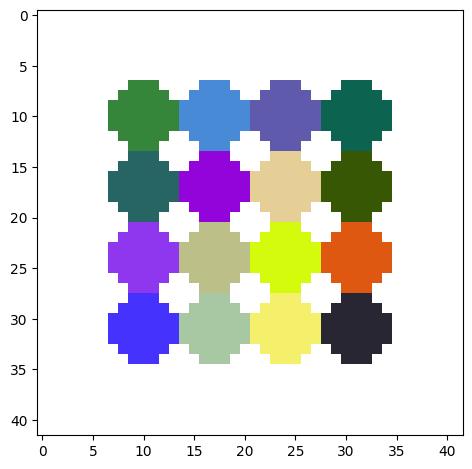

In [51]:
plot_one_frame(frames_for_plot[0])

In [23]:
# gillespie sim

grid_size = 21
num_cells = 1 #relevant if using initialize_cells_random or initiliaze_cells_voronoi when constructing CPM
target_area = 37 #49 #37
target_perimeter = 20.992 #20.992 #0.00
target_ratio = 0.2534 #0.2917 #0.2534 #sqrt(area)/perimeter
temperature = 3

light_function = multiple_moving_bars_light

cpm = CPM(grid_size, num_cells, target_area, target_perimeter, target_ratio, temperature, initialize_cells_random, light_function)

frames_for_plot, light_patterns, event_times = gillespie_sim(cpm, max_time=0.000000000000001)
#frames_for_plot, light_patterns, event_times = mc_sim(cpm, num_steps=100)

animate_simulation(frames_for_plot, event_times, output_filename="current_gil_simulation.mp4")

#light_patterns = [lp.astype(int) for lp in light_patterns]
visualize_dynamic_light_pattern(light_patterns, event_times)

# issue: minmal rates for all moves, never moves forward


Gillespie Simulation:   0%|          | 0.00/0.00 [00:00<?, ?it/s]

minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal total rate
minimal tota

KeyboardInterrupt: 

In [ ]:
animate_simulation(frames_for_plot, event_times)
#light_patterns = [lp.astype(int) for lp in light_patterns]
visualize_dynamic_light_pattern(light_patterns, event_times)

In [ ]:
## example use

#initialize CPM object
cpm = CPM(grid_size, num_cells, target_area, target_perimeter, k, 
          temperature, initialization_function, light_function)

# run simulation of specified number of stpes, save snapshots of cell grid, light grid, and 'times'
frames_for_plot, light_patterns, event_times = mc_sim(cpm, num_steps=200)

# stitich together into an animations
animate_simulation(frames_for_plot, event_times, output_filename="cell_sim.mp4")
visualize_dynamic_light_pattern(light_patterns, event_times, output_filename="light_sim.mp4")